## SLR implemention - 2

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
# read the dataset
df = pd.read_csv(r"C:\Users\angaj\Downloads\height-weight.csv")

In [88]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

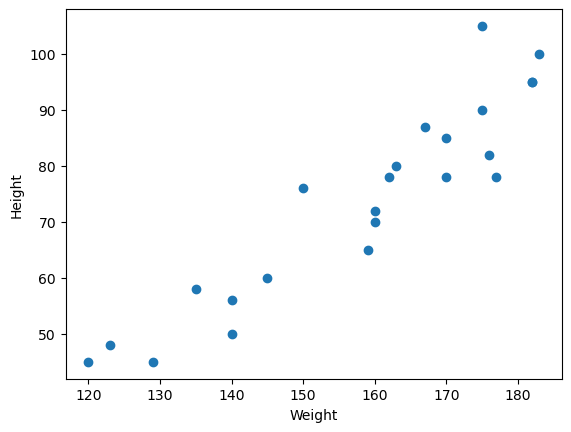

In [89]:
plt.scatter(df.Height, df.Weight)
plt.xlabel("Weight")
plt.ylabel("Height")

In [90]:
# Problem statement >> I want to predict height based on weight


In [91]:
x = df[["Weight"]]
y = df[["Height"]]

In [92]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [93]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [94]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.25, random_state=1)

In [95]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [96]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [97]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140


In [98]:
x_train.shape, x_test.shape, y_train.shape, x_test.shape

((17, 1), (6, 1), (17, 1), (6, 1))

In [99]:
# scalling(optional) >> standarlization >> fit_transform on train data and transfrom on test data 
# if you use fit on test data, (that is worng) you are doing data leakage, avoid it
# most of the ml model standardscaler is used as deals with normal distribution.

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
scaler

StandardScaler()

In [103]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [104]:
# scaling should be done always after train test split
# target variable should not be scaled
# avoid scalling categorical feature

x_train = scaler.fit_transform(x_train) # for train use fit_transfrom
x_test = scaler.transform(x_test) # for test data use transform 

In [105]:
x_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [106]:
x_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

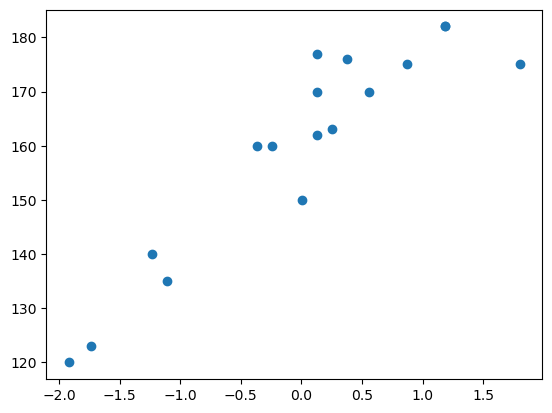

In [107]:
# scaling is optional >> why becaouse it does't affect the distribution of the data

plt.scatter(x_train, y_train)

In [108]:
# model traning 

from sklearn.linear_model import LinearRegression

## fit_intercept >> The best fit line will have intercept, by default it is true
## copy_x >> copy the original x_train and then build the model, it will the original data
## n_jobs >> -1 means using all processors. 
## positive >> when set to True, forces the coefficients to be positive

## fit >> train the model
## predict >> test the model

## after building the model, you have atteributes of the model
## coef_
## intercept

In [110]:
regressor = LinearRegression()

In [111]:
regressor

LinearRegression()

In [112]:
regressor.fit(x_train, y_train)

LinearRegression()

In [113]:
regressor.coef_

array([[17.7307072]])

In [114]:
regressor.intercept_

array([160.])

In [115]:
print("The slope or coeff of model is", regressor.coef_)
print("The intecept of the model is ", regressor.intercept_)

The slope or coeff of model is [[17.7307072]]
The intecept of the model is  [160.]


In [ ]:
# prediction on train data
# interpretation of coef >> one unit increase in weieght, an average he height increse by 17.73 units
# predicted height(y) an x_train = 160+17.73 * (x_train)

# predicted height(y) an x_test = 160+17.73 * (x_test)

In [117]:
# prediction on train data
regressor.predict(x_train)

array([[166.65863288],
       [153.47066096],
       [129.29271243],
       [160.06464692],
       [164.46063756],
       [175.45061417],
       [140.28268904],
       [169.95562586],
       [125.99571945],
       [162.26264224],
       [155.66865628],
       [138.08469371],
       [162.26264224],
       [180.94560247],
       [191.93557907],
       [180.94560247],
       [162.26264224]])

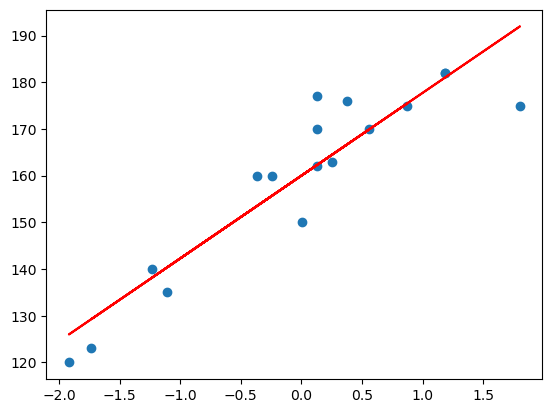

In [121]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = "red")

In [122]:
y_pred_test = regressor.predict(x_test)

In [123]:
y_pred_test

array([[125.99571945],
       [147.97567266],
       [142.48068436],
       [186.44059077],
       [172.15362118],
       [131.49070775]])

In [124]:
y_pred_test, y_test

(array([[125.99571945],
        [147.97567266],
        [142.48068436],
        [186.44059077],
        [172.15362118],
        [131.49070775]]),
     Height
 20     129
 17     159
 3      145
 13     183
 19     167
 16     140)

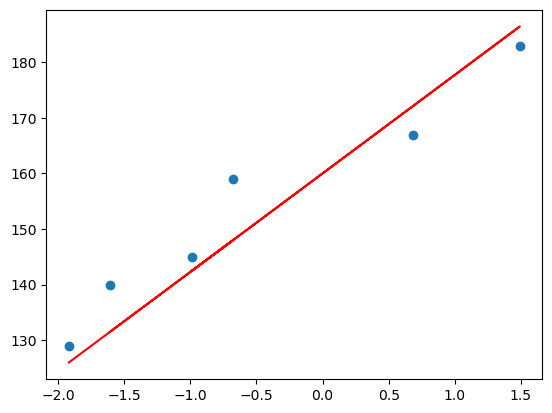

In [127]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regressor.predict(x_test), color = "red")

In [ ]:
# perfomance metrice

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
mean_absolute_error(y_test, y_pred_test)

5.608571289304824

In [131]:
mean_squared_error(y_test, y_pred_test)

41.28566283045539

In [137]:
rsq = r2_score(y_test, y_pred_test) # rsquare = 1-SSR/SST
rsq

0.872103617425661

In [ ]:
# adjusted rsquare
# adjust R2 = [(1-rsquare)*n-1/(n-r-1)] #n is no of observation and k is predictior variance


In [133]:
x_test.shape

(6, 1)

In [138]:
1-(1-rsq)*(len(y_test)-1/len(y_test)-x_test.shape[1] - 1)
# adjusted rsquare will be lesser than r square 

0.5097305334650339

In [ ]:
# assumption
# x-y should have linear relationship
# observation should have no relation
# error should have constant variance
# error should be normally distributed
# feature among themself should be least related

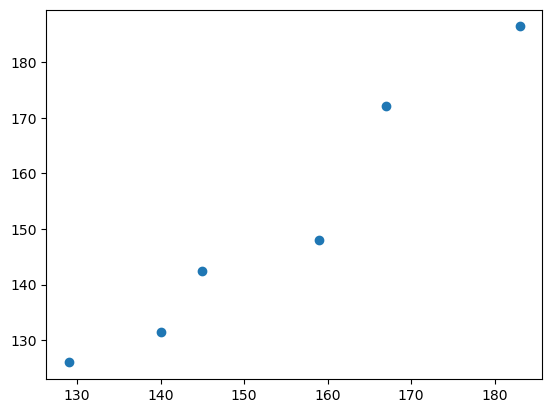

In [139]:
plt.scatter(y_test, y_pred_test)

In [ ]:
# error should have constant variance
# error should be normally distributed

In [140]:
error = y_test - y_pred_test
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


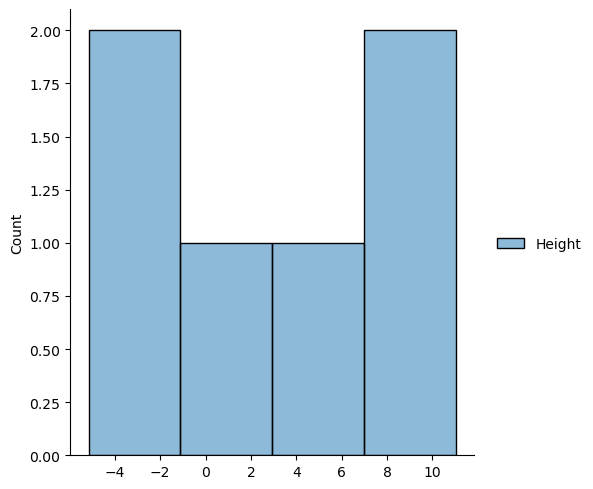

In [141]:
import seaborn as sns 
sns.displot(error)

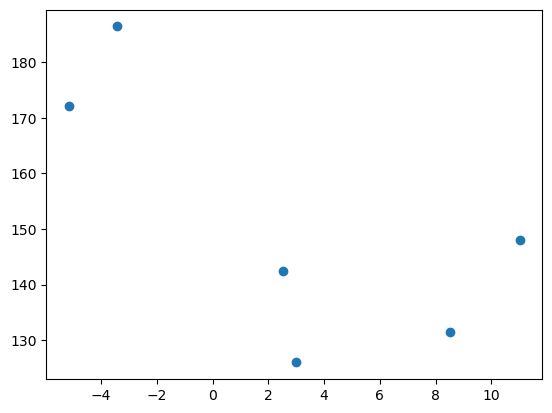

In [142]:
# to check constant variable
plt.scatter(error, y_pred_test)